In [8]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)
from System import *
VASP_Files = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'VASP_Files'))

# Diffraction Map Generation Example

This example demonstrates the capability of **Nookiin** to generate diffraction maps for multilayer systems. Unlike traditional diffraction patterns that only indicate the location of Bragg peaks, diffraction maps represent the continuous intensity distribution across reciprocal space. These maps are constructed by summing Lorentzian contributions centered at each reciprocal lattice point, producing a smooth image where high-intensity regions correspond to constructive interference.

The example shows how to compute, visualize, and export such maps, comparing different systems to highlight the influence of stacking, twist angles, and interlayer complexity.

## Twisted Bilayer Graphene at 2.65°

In [9]:
g1 = graphene()
g2 = graphene().mRot(2.65)
S1 = System([g1,g2])

Supercell calculation for the system.

Size of the primitive vectors: |a|=50.71445Å, |b|=50.71445Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |  12   12|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  864   |
|         Grafeno         |  | -12   24|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11   13|  |  | 0.99989 -0.00210|  |   -0.116% // +0.1°    |  866   |
|     Grafeno(2.65°)      |  | -13   24|  |  | 0.00210  0.99779|  |   -0.116% // +0.1°    |        |
|                         |               |                       |                       |        |

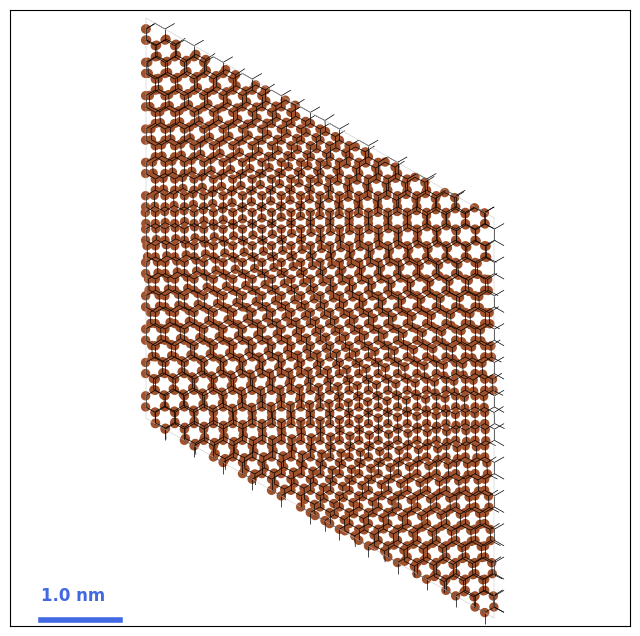

Reciprocal Space:


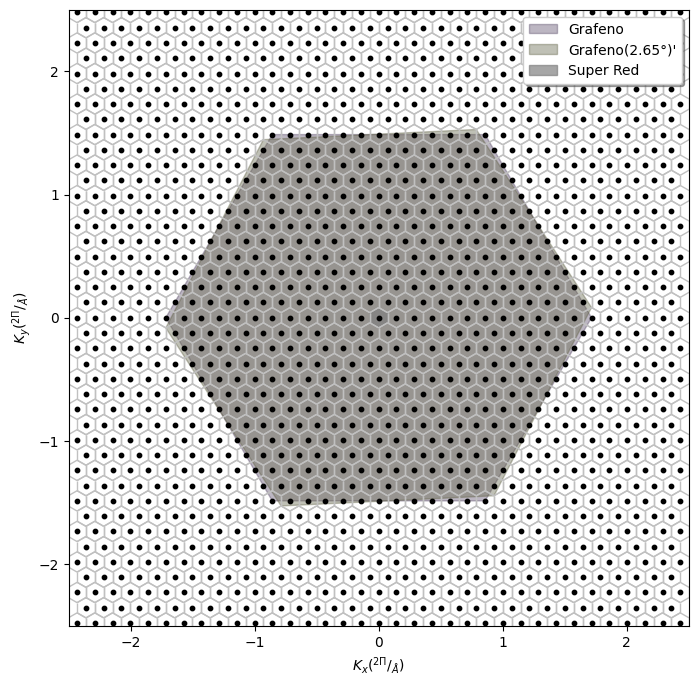

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.


In [10]:
S1 = S1.generateSuperCell(RoS=15, eps=0.01, prntRes=True,showTable=True)

Diffraction Pattern

Calculating Structure Factor....20118 LPs calculated

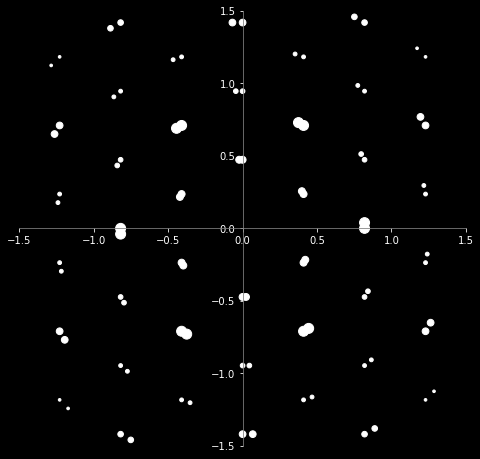

In [4]:
S1.diffractionPattern()

The diffraction map is computed using a Lorentzian distribution with `width=0.005`, a resolution of 300 points, and the result is saved as an image.

Image address: 'C:\SS\Nook’iin\NookIin-beta\Examples\Español\Images/SuperLattice [Grafeno] [Grafeno(2_65°)'](Lorentzian).png'


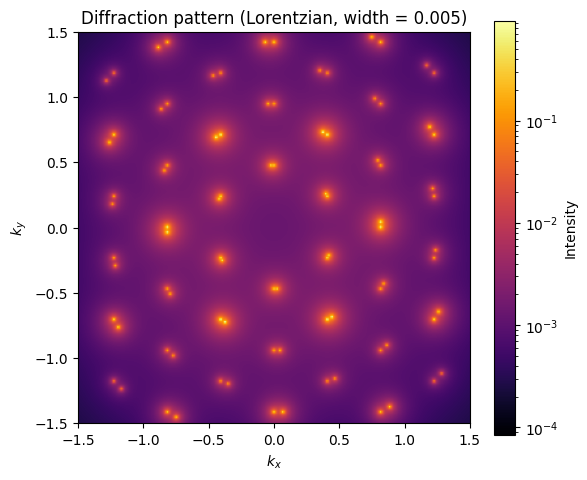

In [5]:
_=S1.plot_diffraction_map(width=0.005, typ="Lorentzian", resolution=300, prnt=True)

## Graphene/hBN Heterostructure at 7.15°

In [11]:
g = importLattice(VASP_Files+"/graphene")
g.name = "Graphene"
hBN = importLattice(VASP_Files+"/hBN")
hBN.name = "h_BN"
S2 = System([g,hBN.mRot(7.15)])

File 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/graphene.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/graphene.vasp'--
File 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/hBN.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/hBN.vasp'--


Size of the primitive vectors: |a|=19.58279Å, |b|=19.58279Å
Angle between vectors: 60.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   6    9|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  126   |
|        Graphene         |  |  -3    6|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |   9    4|  |  | 1.00139 -0.00147|  |   +0.212% // +0.07°   |  122   |
|       h_BN(7.15°)       |  |  -4    5|  |  | 0.00147  1.00286|  |   +0.212% // +0.07°   |        |
|                         |               |                       |                       |        |


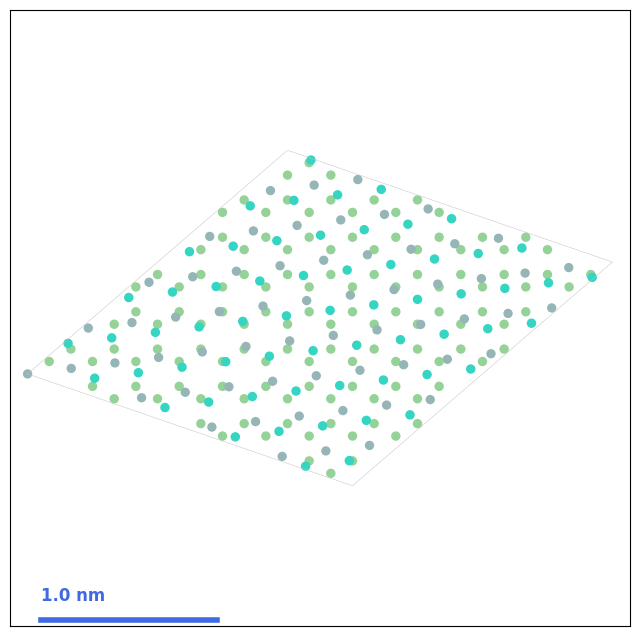

Reciprocal Space:


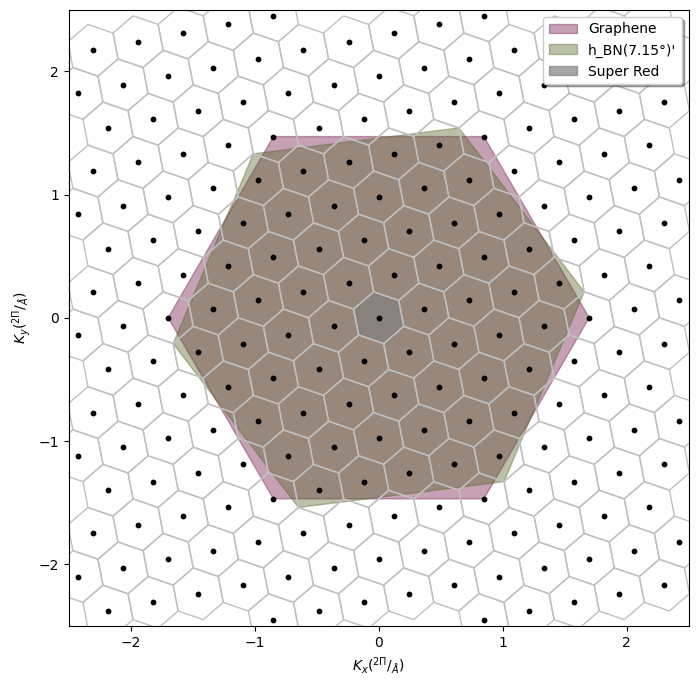

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.


In [12]:
S2 = S2.generateSuperCell(RoS=15, eps=0.01, prntRes=True,showTable=True)

Diffraction map.

In this case, the function `plot_diffraction_map` is executed using default values, and without computing the diffraction pattern in advance. Therefore, the structure factor will be calculated first. Since no value for `width` is given, the function will request it interactively from the user.

Evaluating Structure Factor at each network point.
Calculating Structure Factor....2978 LPs calculated

Enter the value of width (γ):  0.008


Calculating diffraction pattern....100.00%

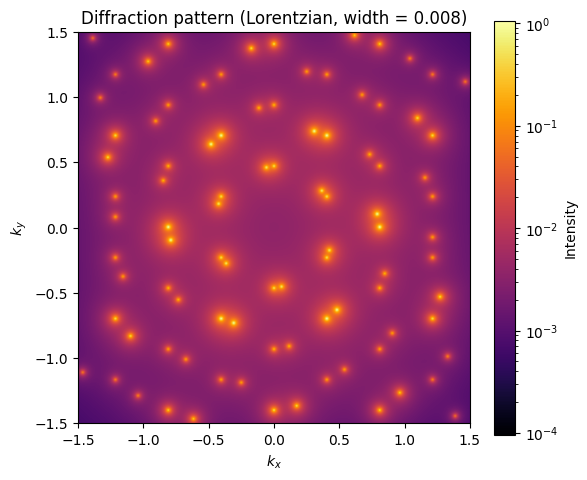

In [13]:
_ = S2.plot_diffraction_map()

## WS₂/hBN(6.37°)/WSe₂(15.24°) Trilayer Heterostructure

In [15]:
WS2 = importLattice(VASP_Files+"/WS2")
hBN = importLattice(VASP_Files+"/hBN")
WSe2 = importLattice(VASP_Files+"/WSe2")
S3 = System([WS2,hBN.mRot(6.37),WSe2.mRot(15.24)])

File 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/WS2.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/WS2.vasp'--
File 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/hBN.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/hBN.vasp'--
File 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/WSe2.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\NookIin-beta\VASP_Files/WSe2.vasp'--


Size of the primitive vectors: |a|=55.39805Å, |b|=32.85770Å
Angle between vectors: 27.167°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   1    6|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  288   |
|           WS2           |  | -17   -6|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  21   15|  |  | 0.99248 -0.02038|  |   -1.018% // -0.27°   |  312   |
|       hBN(6.37°)        |  | -23   -9|  |  |-0.00533  0.99026|  |   -1.977% // +1.03°   |        |
|                         |               |                       |                       |        |


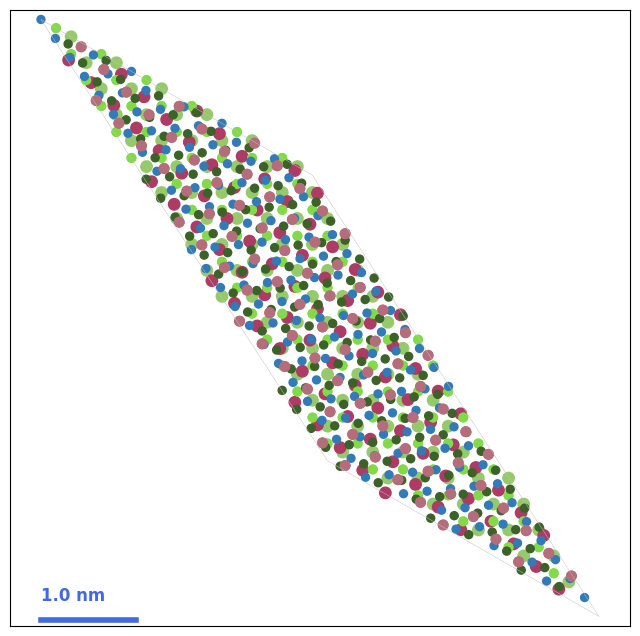

Reciprocal Space:


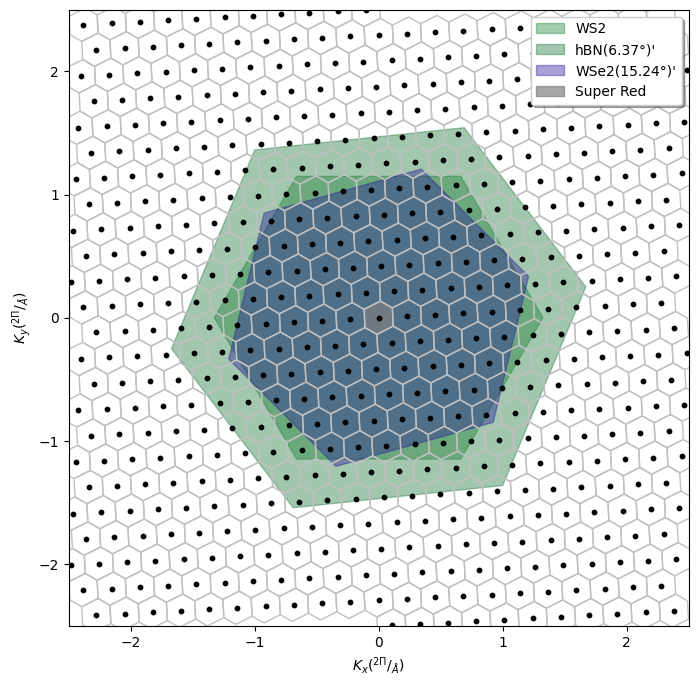

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.


In [16]:
S3=S3.generateSuperCell(RoS=20, eps=0.02, showTable=True)

Diffraction map.

In this case, the `plot_diffraction_map` function will be executed using both **Gaussian** and **Lorentzian** distributions, again without precomputing the diffraction pattern.

As in the previous example, the structure factor will be calculated first. Unlike the Lorentzian case, when using the Gaussian distribution, it is recommended to use a larger `width` value than usual to achieve comparable visibility in the output.

Evaluating Structure Factor at each network point.
Calculating diffraction pattern....100.00%alculated

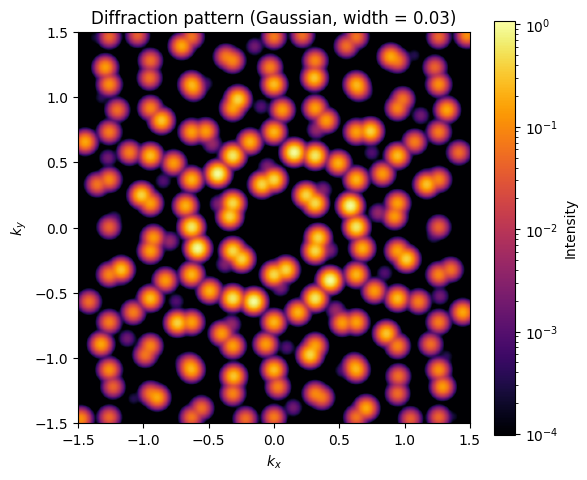

Calculating diffraction pattern....100.00%

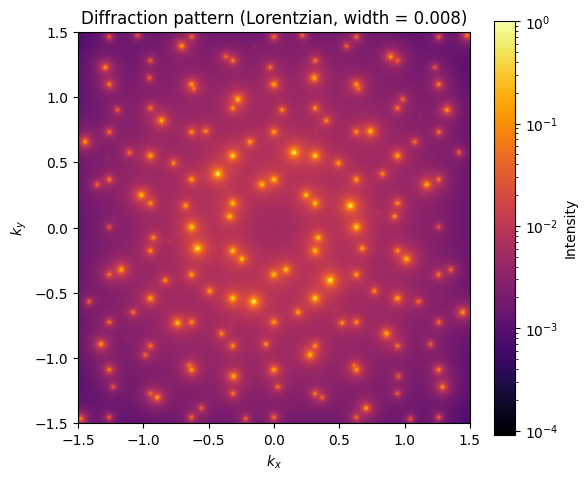

In [17]:
_ = S3.plot_diffraction_map(width=0.03, typ="Gaussian",resolution=300)
_ = S3.plot_diffraction_map(width=0.008, typ="Lorentzian",resolution=300)